# DT_3 Multiclass Classification using Decision Trees

Instrucciones:

1. Para este ejercicio utilizarán el dataset en: https://archive.ics.uci.edu/ml/datasets/balance+scale, que es un dataset con una salida de 3 clases: L, R, B.
2. Del siguiente link, realizar la práctica: https://adityagoel123.medium.com/multi-class-classification-using-decision-tree-model-68e75114303
3. Obtener la matriz de Confusión para los datos de entrenamiento y los datos de testing
4. Realiza la misma práctica utilizando los datos del dataset de dígitos que utilizamos para el perceptron multiclase (https://www.kaggle.com/competitions/digit-recognizer/data)

In [1]:
import pandas as pd



In [5]:
data = pd.read_csv("balance-scale.data")

data.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   B       624 non-null    object
 1   1       624 non-null    int64 
 2   1.1     624 non-null    int64 
 3   1.2     624 non-null    int64 
 4   1.3     624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [9]:
X = data.iloc[:,1:5]

y = data.iloc[:,0]

X.head()

,1,1.1,1.2,1.3
0,1,1,1,2
1,1,1,1,3
2,1,1,1,4
3,1,1,1,5
4,1,1,2,1


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

X_train.shape

(468, 4)

In [11]:
X_test.shape

(156, 4)

In [46]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(criterion='gini', random_state=100,max_depth=4)

arbol_data = arbol.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

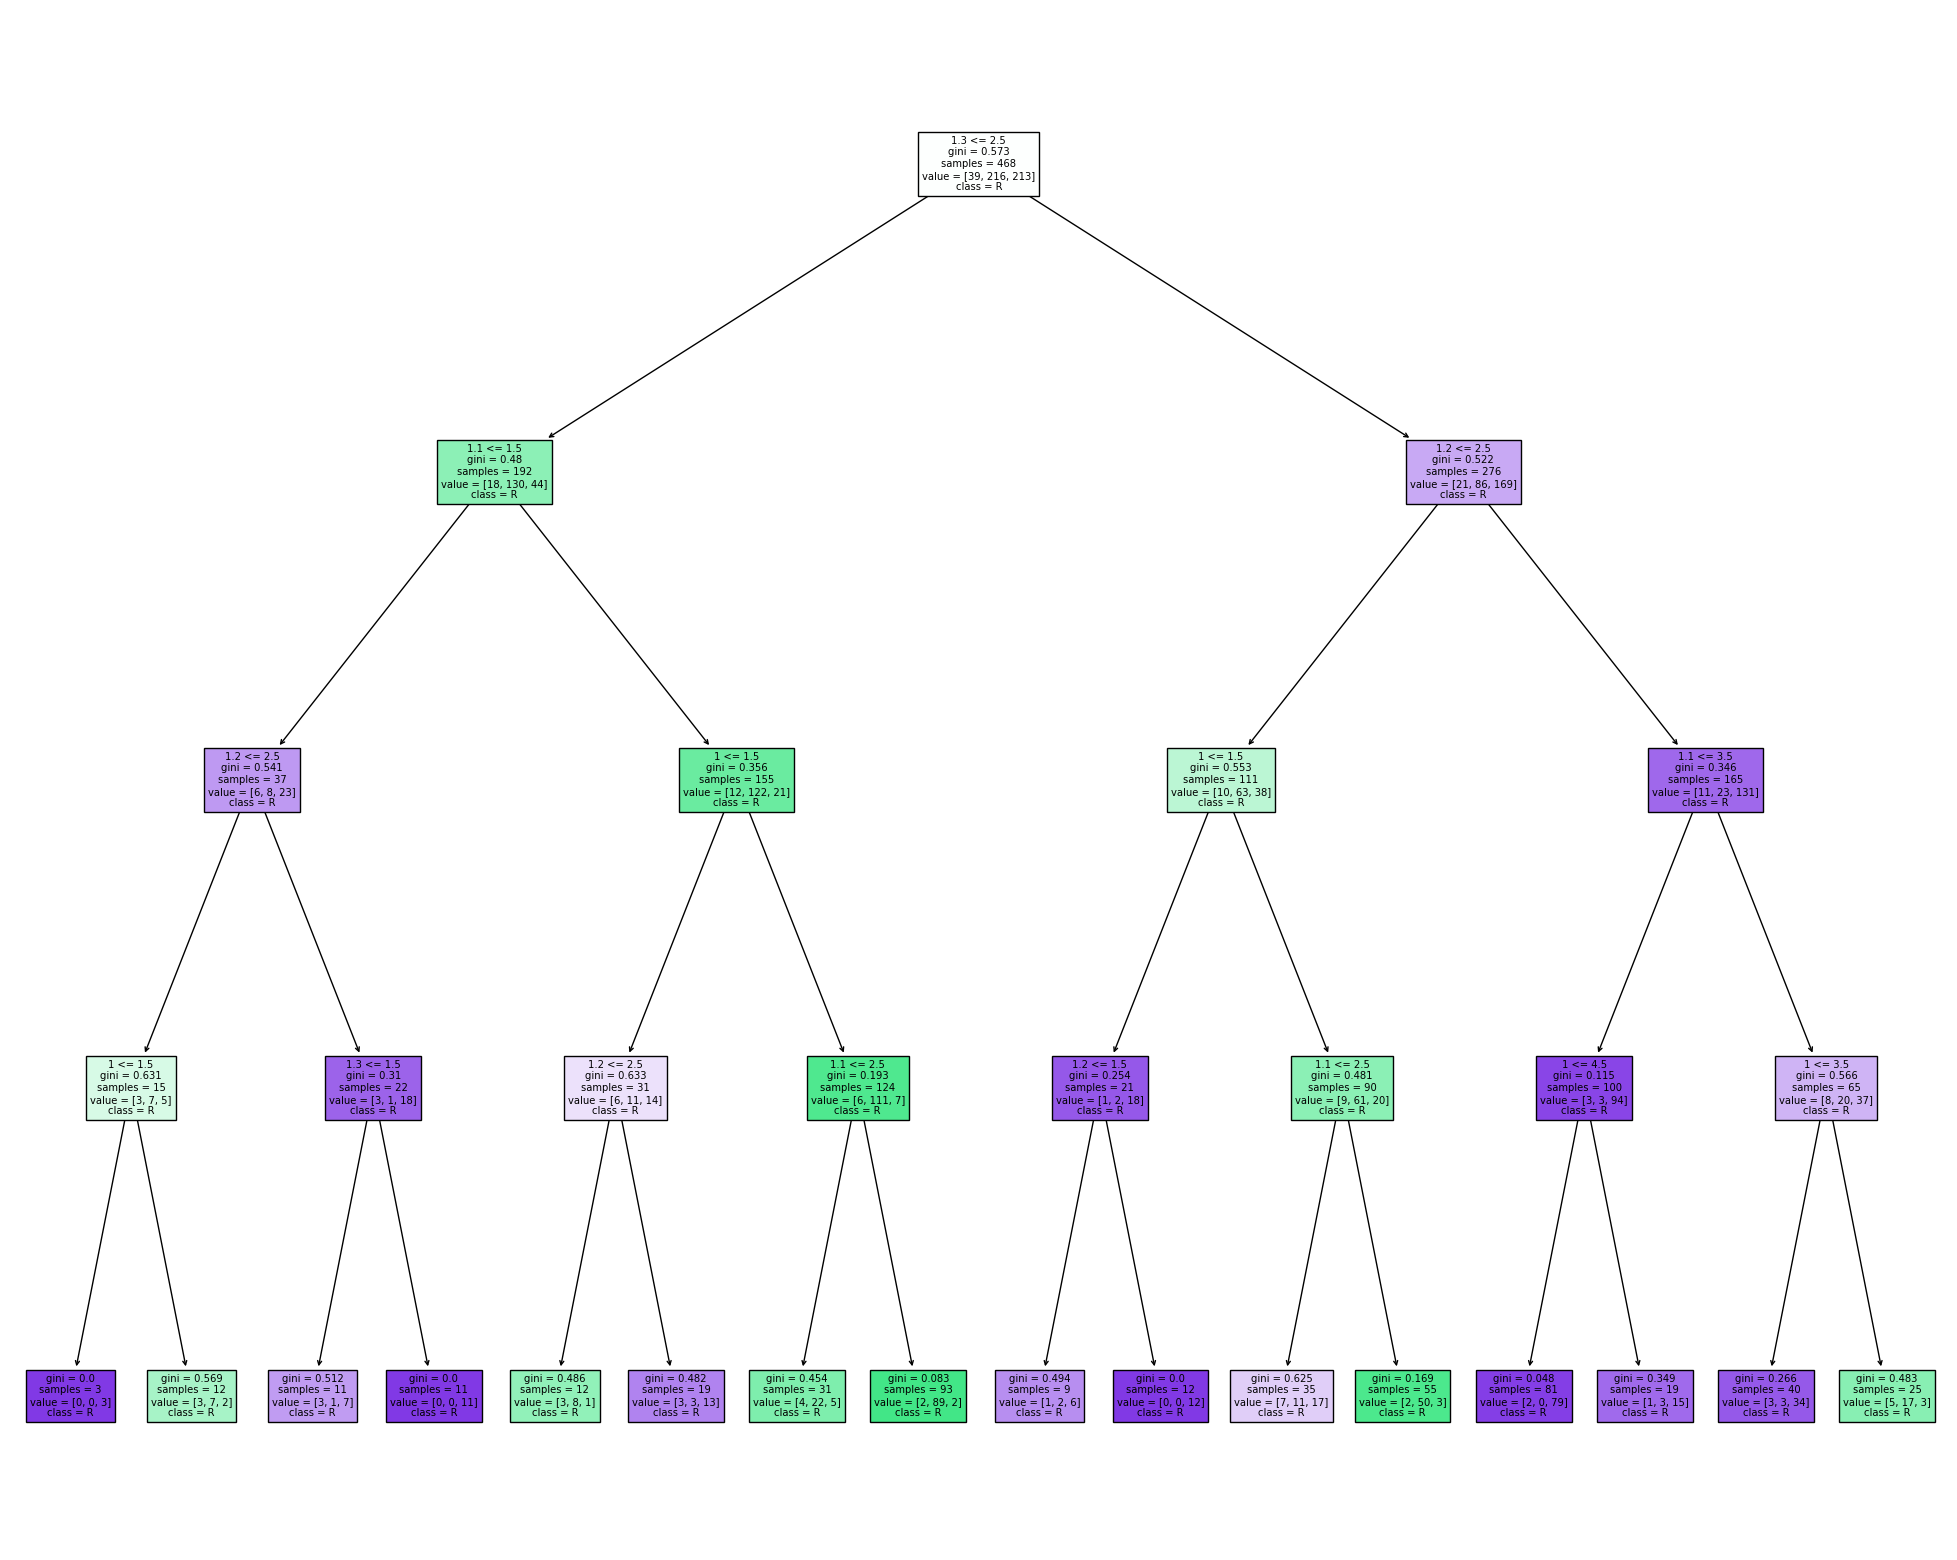

In [47]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol_data, feature_names= list(X.columns.values), class_names= list(y.values), filled= True)
plt.show

In [48]:
y_pred_test = arbol_data.predict(X_test)

y_pred_test

array(['L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R',
       'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'L', 'L',
       'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'L', 'L',
       'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L',
       'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'L'],
      dtype=object)

In [49]:
from sklearn.metrics import confusion_matrix

MC = confusion_matrix(y_test, y_pred_test)

MC

array([[ 0,  4,  5],
       [ 0, 60, 12],
       [ 0,  8, 67]], dtype=int64)

In [50]:
import numpy as np

Accuracy_test = np.sum(MC.diagonal()) / np.sum(MC)

Accuracy_test

0.8141025641025641